# Predicting the ages of abalones using Linear Regression

*Note: if you don't now what an abalone is, you might want to educate yourself before proceeding further:*
    https://en.wikipedia.org/wiki/Abalone

In this notebook, we use linear regression to predict the ages of abalones.
The dataset used in this short tutorial is available here: https://archive.ics.uci.edu/ml/datasets/abalone.

This dataset provides measurements on physical characteristics of abalones such as length, diameter, height, weight, etc. This physical features will be used to infer the age of abalones.

## 1. Data Visualization
Let's load and visualize the dataset using Pandas

In [1]:
import pandas as pd
import numpy as np
np.random.seed(123)

In [2]:
names = ['Sex', 'Length', 'Diameter', 'Height', 'Whole weight',
         'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings']

In [3]:
abalone_df = pd.read_csv('abalone.data', names=names)

In [4]:
abalone_df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
5,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.1200,8
6,F,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.3300,20
7,F,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.2600,16
8,M,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.1650,9
9,F,0.550,0.440,0.150,0.8945,0.3145,0.1510,0.3200,19


In [5]:
features = ['Length', 'Diameter', 'Height', 'Whole weight',
         'Shucked weight', 'Viscera weight', 'Shell weight']

In [6]:
corr = []
for f in features:
    c = abalone_df[f].corr(abalone_df['Rings'], method='spearman')
    corr.append(c)

In [7]:
corr

[0.60438533540463257,
 0.62289500509215345,
 0.65771637098609093,
 0.63083195546639859,
 0.53941998208345787,
 0.61434381231405122,
 0.69247456077935632]

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

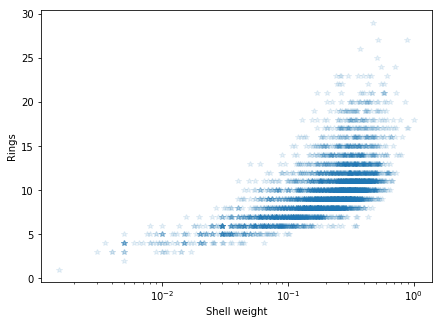

In [9]:
plt.figure(figsize=[7, 5])
plt.semilogx(abalone_df['Shell weight'], abalone_df['Rings'], '*', alpha=.1)
plt.ylabel('Rings')
plt.xlabel('Shell weight')

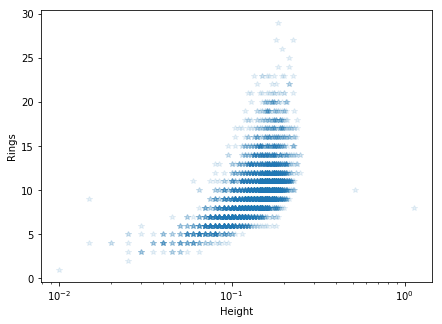

In [10]:
plt.figure(figsize=[7, 5])
plt.semilogx(abalone_df['Height'], abalone_df['Rings'], '*', alpha=.1)
plt.ylabel('Rings')
plt.xlabel('Height')

In the column **Sex**, `M`, `F`, and `I` represent male, female, and infant, respectively. Nevertheless, we will ignore this feature, and only consider physical (measurable) features in order to infer ages.

As described in the dataset documentation, the age of an Abalone is given as `Rings` + 1.5 (and that's the label we want to estimate). Therefore, let's add an `Age` label to our dataset:

In [11]:
abalone_df['Age'] = abalone_df['Rings'] + 1.5

## 2. Model fitting

Let's use Scikit-learn to split the dataset in training set and testing set:

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(abalone_df.loc[:, 'Length':'Shell weight'],
                                                    abalone_df['Age'], test_size=.3)

Now, let's import the objective function ``L2Norm`` and the model ``LinearModel`` from ``macaw``:

In [14]:
from macaw.objective_functions import L2Norm
from macaw.models import LinearModel

See https://mirca.github.io/macaw/api/objective_functions.html#macaw.objective_functions
for documentation.

Let's instantiate an object from ``LinearModel`` and from ``L2Norm`` passing the labels ``y_train`` to the objective function and the features ``X_train`` to the ``LinearModel``:

In [15]:
l2norm = L2Norm(y=np.array(y_train, dtype=float), model=LinearModel(np.array(X_train, dtype=float)))

Let's use the method `fit` to get the maximum likelihood weights.

*Note that we need to pass an initial estimate for the linear weights and bias of the `LinearModel`*:

In [16]:
res = l2norm.fit(x0=np.zeros(X_train.shape[1] + 1), ftol=0)

The maximum likelihood weights can accessed using the ``.x`` attribute:

In [17]:
res.x

array([ -1.92692825,  13.91714826,  10.18261543,   9.75342147,
       -20.87769625,  -9.89679523,   8.34389868,   4.56176106])

Additionally, we can check the status of the `fit` and the number of iterations that it took to converge.

In [18]:
res.status

'Success: parameters have not changed by 1e-06 since the previous iteration.'

In [19]:
print("Number of iterations needed: {}".format(res.niters))

Number of iterations needed: 127


Now, let's compute the Mean Squared Error between the model and the labels on the test set:

In [20]:
model_test = LinearModel(X_test)

In [21]:
print('The mean squared error of the model on the test set is {}'
      .format(np.mean((model_test(*res.x) - y_test) ** 2)))

The mean squared error of the model on the test set is 4.867201239148009


## 3. Comparison against scikit-learn

Let's compare ``macaw`` against ``scikit-learn``:

In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
lreg = LinearRegression()

In [24]:
lreg.fit(X_train, y_train)

/Users/jvmirca/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:1226: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [25]:
print('The mean squared error of the model on the test set is {}'
      .format(np.mean((lreg.predict(X_test) - y_test) ** 2)))

The mean squared error of the model on the test set is 4.867210207940822


**Looks like** `macaw` **has a good agreement with** `sklearn` **:)!**

## 4. Linear Regression with L1 Regularization

In [26]:
from macaw.objective_functions import Lasso

In [31]:
alpha = [1e-3, 1e-2, .1, 1., 10., 100.]

In [32]:
mse = []
for a in alpha:
    lasso = Lasso(y=np.array(y_train, dtype=float), X=np.array(X_train, dtype=float), alpha=a)
    res_lasso = lasso.fit(x0=np.ones(X_train.shape[1] + 1))
    mse.append(np.mean((model_test(*res_lasso.x) - y_test) ** 2))

In [33]:
mse

[4.867263167748132,
 4.867277337599111,
 4.8679354412745655,
 4.8756478738362805,
 5.09963858836932,
 5.1534303485996595]

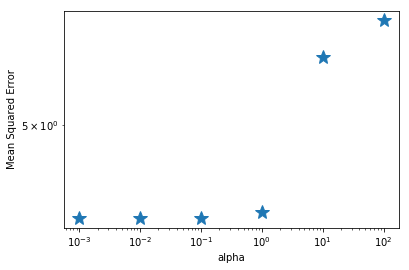

In [34]:
plt.loglog(alpha, mse, '*', markersize=15)
plt.ylabel('Mean Squared Error')
plt.xlabel('alpha')